In [1]:
import os

## Read the dataset directories 

In [2]:
base_dir = 'Dataset/'

train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training fall/nonfall pictures
train_fall_dir = os.path.join(train_dir, 'falling')
train_non_fall_dir = os.path.join(train_dir, 'non_falling')

# Directory with our validation fall/nonfall pictures
validation_fall_dir = os.path.join(validation_dir, 'falling')
validation_non_fall_dir = os.path.join(validation_dir, 'non_falling')

In [3]:
train_fall_dir, train_non_fall_dir, validation_fall_dir, validation_non_fall_dir

('Dataset/Training/falling',
 'Dataset/Training/non_falling',
 'Dataset/Validation/falling',
 'Dataset/Validation/non_falling')

## Converting all images and saving them to grayscale [Optional]
### I did it whlie running a script that extracs frames and convert the frames to grayscale on the go

In [4]:
import cv2

for folder in [train_fall_dir, train_non_fall_dir, validation_fall_dir, validation_non_fall_dir]:
    for img in os.listdir(folder):
        im_gray = cv2.imread(folder + "/" + img, cv2.COLOR_RGB2GRAY)
        gray = cv2.cvtColor(im_gray, cv2.COLOR_BGR2GRAY)
        cv2.imwrite("gray_"+folder+"/gray_"+img, gray)

## Plot random image

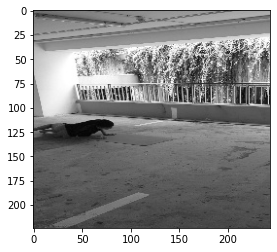

In [7]:
import matplotlib.pyplot as plt

rand_idx = 7
rand_img = 'Dataset/Training/falling' + '/' + os.listdir(train_fall_dir)[rand_idx]

im = cv2.imread(rand_img)
plt.imshow(im)

In [9]:
import matplotlib.image as mpimg
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=0
base_dir = 'Dataset/'

train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training fall/nonfall pictures
train_fall_dir = os.path.join(train_dir, 'falling')
train_non_fall_dir = os.path.join(train_dir, 'non_falling')

# Directory with our validation fall/nonfall pictures
validation_fall_dir = os.path.join(validation_dir, 'falling')
validation_non_fall_dir = os.path.join(validation_dir, 'non_falling')

next_fall_pix = [os.path.join(train_fall_dir, fname) 
                for fname in os.listdir(train_fall_dir)[ pic_index-8:pic_index] 
               ]

next_non_fall_pix = [os.path.join(train_non_fall_dir, fname) 
                for fname in os.listdir(train_non_fall_dir)[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_fall_pix+next_non_fall_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    im_gray = cv2.imread(img_path)

    #im_bw = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY)[1]
    #print(im_bw.shape)
    #gray = cv2.cvtColor(im_bw, cv2.COLOR_BGR2GRAY)
    #print(gray.shape)
    #fgmask = fgbg.apply(im_bw)
    plt.imshow(im_gray)

plt.show()

<Figure size 1152x1152 with 0 Axes>

## Building the Model

In [11]:
import tensorflow as tf

In [12]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.,vertical_flip=True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (224, 224))


Found 49795 images belonging to 2 classes.
Found 7944 images belonging to 2 classes.


In [18]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch = 100,
                              epochs=20)

Epoch 1/20
100/100 [==============================] - 154s 2s/step - loss: 0.1413 - acc: 0.9485 - val_loss: 0.1805 - val_acc: 0.9546
Epoch 2/20
100/100 [==============================] - 154s 2s/step - loss: 0.1702 - acc: 0.9415 - val_loss: 0.0962 - val_acc: 0.9641
Epoch 3/20
100/100 [==============================] - 155s 2s/step - loss: 0.1719 - acc: 0.9330 - val_loss: 0.0866 - val_acc: 0.9682
Epoch 4/20
100/100 [==============================] - 154s 2s/step - loss: 0.1438 - acc: 0.9430 - val_loss: 0.1577 - val_acc: 0.9571
Epoch 5/20
100/100 [==============================] - 161s 2s/step - loss: 0.1495 - acc: 0.9405 - val_loss: 0.0904 - val_acc: 0.9660
Epoch 6/20
100/100 [==============================] - 173s 2s/step - loss: 0.1472 - acc: 0.9510 - val_loss: 0.0815 - val_acc: 0.9690
Epoch 7/20
100/100 [==============================] - 158s 2s/step - loss: 0.1383 - acc: 0.9485 - val_loss: 0.1414 - val_acc: 0.9684
Epoch 8/20
100/100 [==============================] - 157s 2s/step - 

Text(0.5, 1.0, 'Training and validation loss')

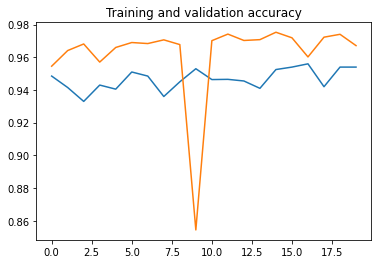

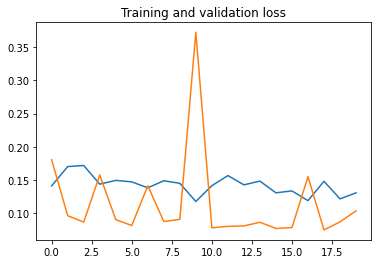

In [19]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

## Saving the Model

In [20]:
from tensorflow.keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model_v5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_v5.h5")
print("Saved model to disk")

Saved model to disk


## Loading the Model

In [21]:
# load json and create model
json_file = open('model_v5.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_v5.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [22]:
score = loaded_model.evaluate_generator(validation_generator)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 96.71%


## Testing the Model on an image

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [24]:
for i in os.listdir("Dataset/Validation/falling/")[0:1]:
    img=image.load_img("Dataset/Validation/falling/"+i, target_size=(224, 224))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = loaded_model.predict(images, batch_size=10)
    if int(classes[0][0]) == 0:
        print("fall")
    else:
        print("non_fall")

fall
